# How Do I Use EDGAR?

https://www.sec.gov/edgar/quickedgar.htm

`cik`: Central Index Key
`cik-number`: 
    

# edgar daily-index

https://www.sec.gov/Archives/edgar/daily-index/

# Using EDGAR to Research Investments

https://www.sec.gov/oiea/Article/edgarguide.html

# Accessing EDGAR Data

https://www.sec.gov/edgar/searchedgar/accessing-edgar-data.htm

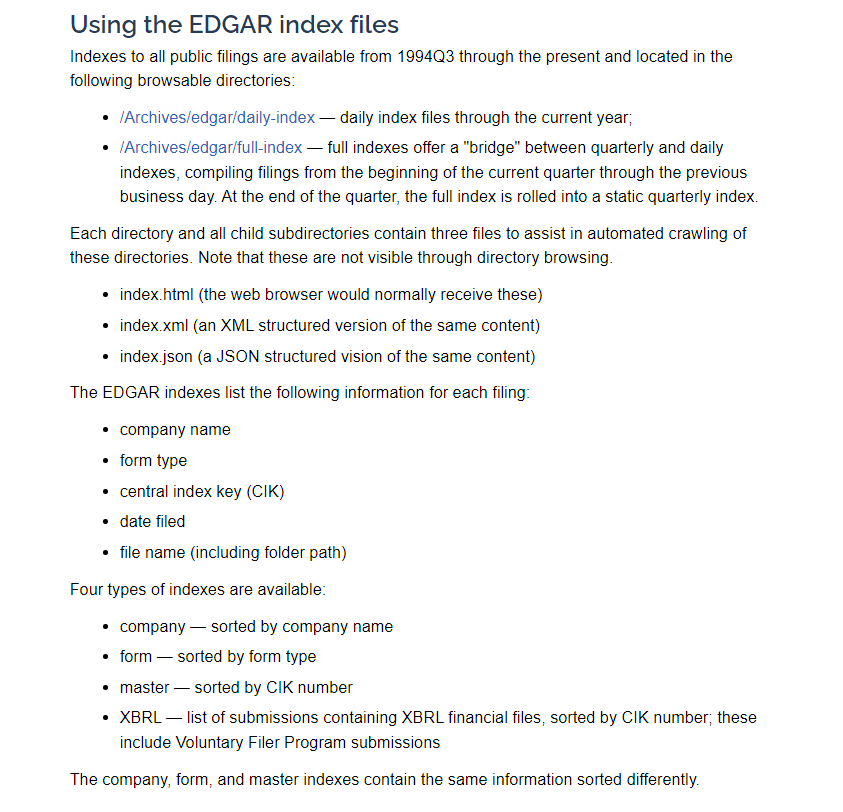

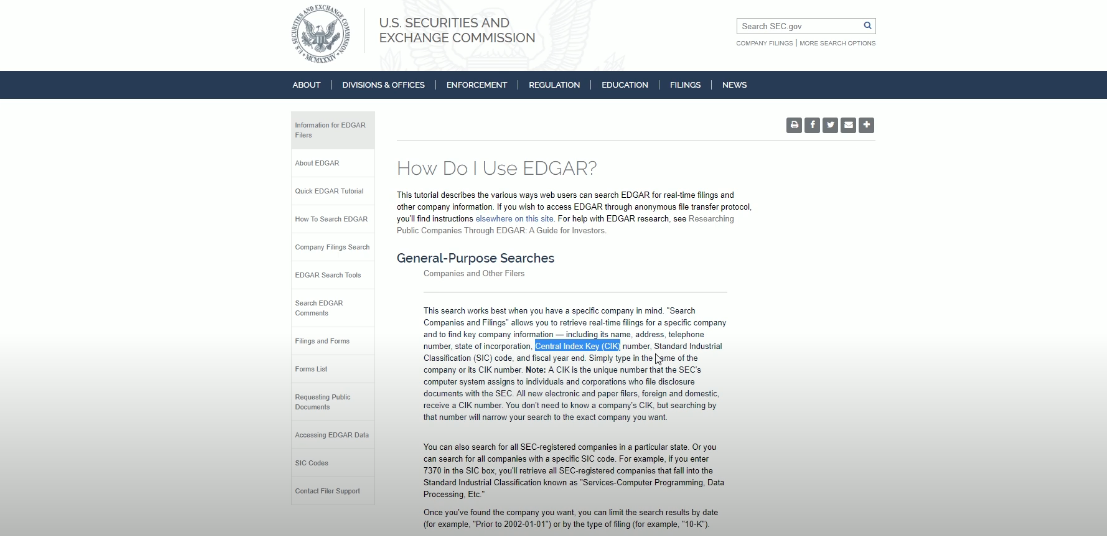

# Sample Data


- cik number를 알면 개별 회사들의 archive에 접근할 수 있다.
- https://www.sec.gov/Archives/edgar/data/{cik_number}/{submission}/{submission_files}

https://www.sec.gov/Archives/edgar/data/886982

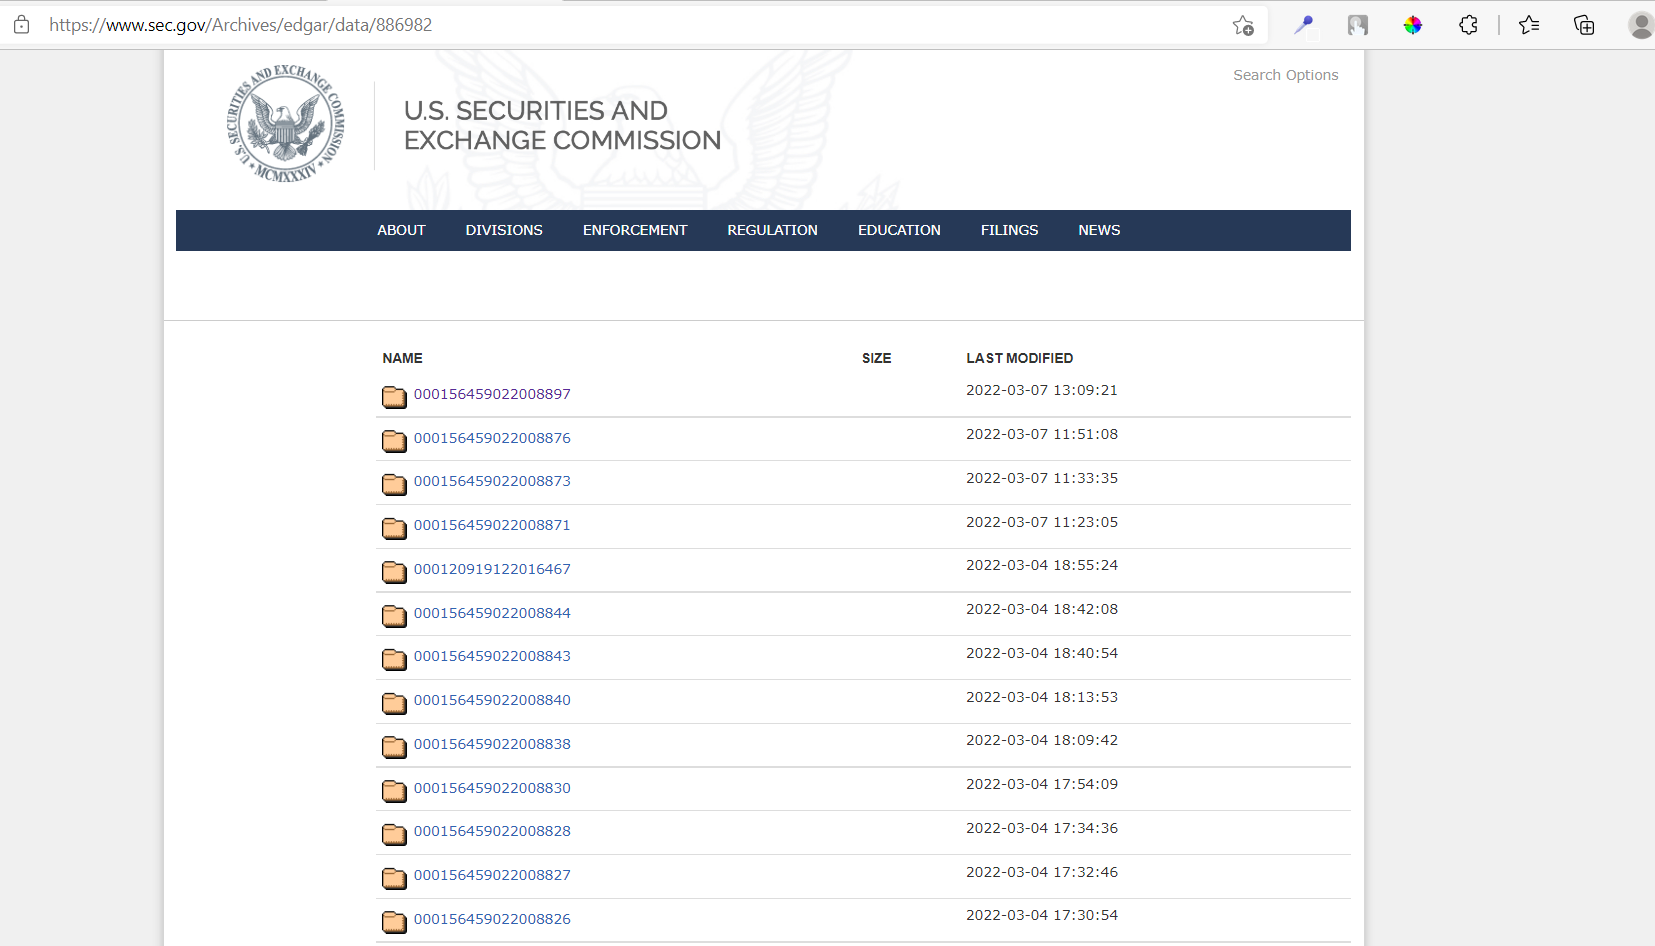

- 내가 찾는 문서가 무엇인지 정해야한다.

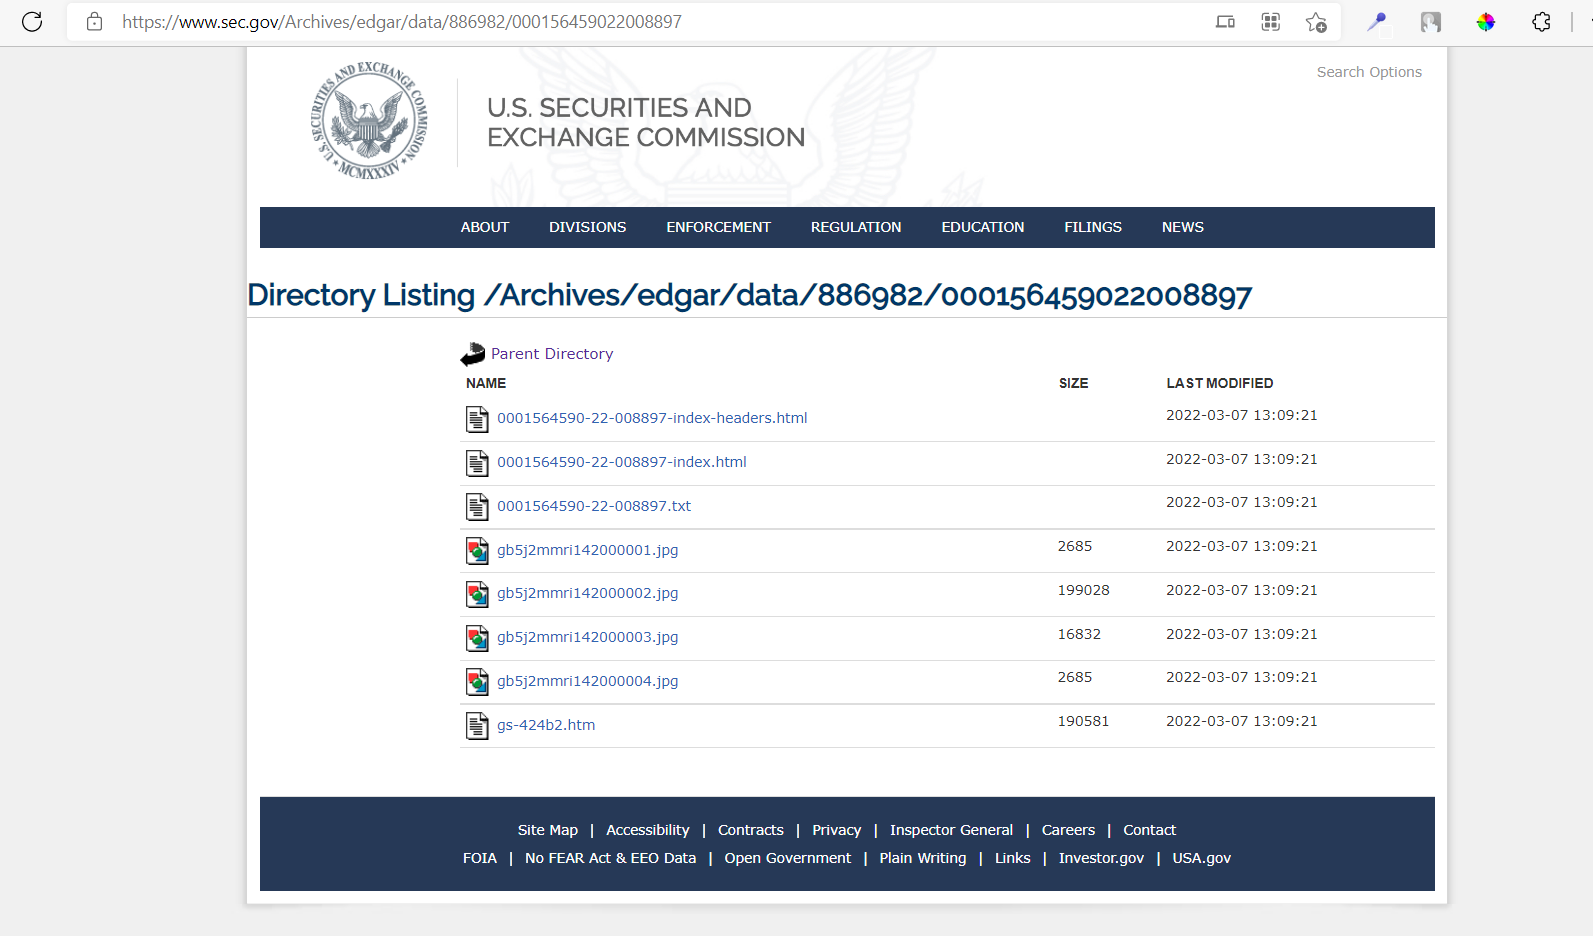

In [22]:
import requests
import pandas as pd
from urllib.parse import urljoin
from bs4 import BeautifulSoup

In [38]:
# define the base url needed to create the file url
base_url = r"https://www.sec.gov/Archives/edgar/data"

# cik_num - cik list를 받아와야함
cik_num = '/1265107/'

In [85]:
submission_url = base_url + cik_num

In [86]:
headers = {
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"
}

# request the url and decode it.
page = requests.get(submission_url, headers=headers)
filings = BeautifulSoup(page.content, 'html.parser')

In [87]:
submission_list = []

for file in filings.find("table", {"summary": "Directory Listing for $full_dir"}):
    for submission in file.select("tr > td > a"):
        submission_list.append(submission.text)

In [88]:
submission_list

['000126510721000019',
 '000126510721000015',
 '000145498421000002',
 '999999999521000380',
 '000126510721000009',
 '000126510721000007',
 '000126510721000005',
 '000126510721000003',
 '000000000021000112',
 '000110465920140625',
 '000110465920140202',
 '000000000020011927',
 '000126510720000063',
 '000126510720000061',
 '000126510720000059',
 '000126510720000057',
 '000126510720000055',
 '000126510720000053',
 '999999999520002533',
 '000126510720000051',
 '000110465920098766',
 '000126510720000048',
 '000126510720000046',
 '000126510720000042',
 '000126510720000039',
 '000126510720000037',
 '000126510720000031',
 '000126510720000028',
 '000126510720000023',
 '000126510720000021',
 '000126510720000018',
 '000126510720000016',
 '000126510720000014',
 '000126510720000011',
 '000126510720000009',
 '000126510720000007',
 '000126510720000004',
 '000126510720000002',
 '999999999520000035',
 '000104746920000120',
 '000110465920001603',
 '000000000019016726',
 '000104746919006859',
 '000126510

In [90]:
# sample one company
filing_url = base_url + cik_num + submission_list[0]

In [91]:
headers = {
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"
}

# request the url and decode it.
page = requests.get(filings_url, headers=headers)
filings = BeautifulSoup(page.content, 'html.parser')

In [96]:
submission

<a href="/Archives/edgar/data/1265107/000119312503068342"><img alt="folder icon" class="img_icon" src="/icons/folder.gif"/>000119312503068342</a>

In [99]:
filing_urls = []

for file in filings.find("table", {"summary": "Directory Listing for $full_dir"}):
    for link in file.select("tr > td > a"):
        document_url = base_url + cik_num + submission_list[0] + "/" + link.text
        filing_urls.append(document_url)

In [100]:
for file_url in filing_urls:
    print(file_url)
# https://www.sec.gov/Archives/edgar/data/1265107/000126510719000004/0001265107-19-000004-index-headers.html

https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/0001265107-19-000004-index-headers.html
https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/0001265107-19-000004-index.html
https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/0001265107-19-000004.txt
https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/0001265107-19-000004-xbrl.zip
https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/FilingSummary.xml
https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/Financial_Report.xlsx
https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/moni10k2018ex21.htm
https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/moni10k2018ex24.htm
https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/moni10k2018ex311.htm
https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/moni10k2018ex312.htm
https://www.sec.gov/Archives/edgar/data/1265107/000126510721000019/moni10k2018ex3

In [ ]:
def make_url(base_url, comp):
    
    url = base_url
    
    # add each component to the base_url
    for r in comp:
        url = "{}/{}".format(url, r)
        
    return url

base_url = r"https://www.sec.gov/Archives/edgar/data"
# components = ["cik_number", "submission", "filing"]
make_url(base_url, compoenents)

# txt file

In [101]:
new_html_text = r"https://www.sec.gov/Archives/edgar/data/1166036/000110465904027382/0001104659-04-027382.txt"

headers = {
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"
}

# grab the response
response = requests.get(new_html_text, headers=headers)

# pass it through the parser, in this case let's just use lxml because the tags seem to follow xml.
soup = BeautifulSoup(response.content, 'lxml')

# Defining Our Master Dictionary To House Filings

Assuming you want to parse more than one filing, we will need to create a structure that allows for a natural hierarchy. This hierarchy will provide a defined path to each component of our filing, while still being flexible enough to grow as you need to add different pieces.

At the highest level, we have our master_filings_dict, which will contain all the filings we scrape. For this to work, we need a mechanism that provides a unique identifier to serve as our dictionary key. In this case, the accession_number will work perfectly as it's unique for every filing.

From here, we will have an accession dictionary, which will contain two parts:

One for the SEC Header content, which is found at the top of every filing.
One for the filing documents, which will contain all the documents for a filing.
To be clear, a filing can contain multiple documents. For example, a filing can include a 10-K document and an exhibit document. You must remember this it will help you understand the upcoming sections.

In [103]:
# define a dictionary that will house all filings.
master_filings_dict = {}

# let's use the accession number as the key. This 
accession_number = '0001104659-04-027382'

# add a new level to our master_filing_dict, this will also be a dictionary.
master_filings_dict[accession_number] = {}

# this dictionary will contain two keys, the sec header content, and a documents key.
master_filings_dict[accession_number]['sec_header_content'] = {}
master_filings_dict[accession_number]['filing_documents'] = None

# Examing the SEC-Header Tag

Honestly, I would not want to scrape this poriton of the filing. The reason why is it's a bunch text that isn't strucutred well. Also you probably can get this information from somewhere else in the filing and have it be more structured. However, there may be some information in this part that people want. Here's a simple solution. Grab first, and parse later.

In [104]:
# grab the sec-header tag, so we can store it in the master filing dictionary.
sec_header_tag = soup.find('sec-header')

# store the tag in the dictionary just as is.
master_filings_dict[accession_number]['sec_header_content']['sec_header_code'] = sec_header_tag

# display the sec header tag, so you can see how it looks.
display(sec_header_tag)

<sec-header>0001104659-04-027382.hdr.sgml : 20040913
<acceptance-datetime>20040913074905
ACCESSION NUMBER:		0001104659-04-027382
CONFORMED SUBMISSION TYPE:	8-K/A
PUBLIC DOCUMENT COUNT:		7
CONFORMED PERIOD OF REPORT:	20040730
ITEM INFORMATION:		Completion of Acquisition or Disposition of Assets
ITEM INFORMATION:		Financial Statements and Exhibits
FILED AS OF DATE:		20040913
DATE AS OF CHANGE:		20040913

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			MARKWEST ENERGY PARTNERS L P
		CENTRAL INDEX KEY:			0001166036
		STANDARD INDUSTRIAL CLASSIFICATION:	CRUDE PETROLEUM &amp; NATURAL GAS [1311]
		IRS NUMBER:				270005456
		FISCAL YEAR END:			1231

	FILING VALUES:
		FORM TYPE:		8-K/A
		SEC ACT:		1934 Act
		SEC FILE NUMBER:	001-31239
		FILM NUMBER:		041026639

	BUSINESS ADDRESS:	
		STREET 1:		155 INVERNESS DR WEST
		STREET 2:		STE 200
		CITY:			ENGLEWOOD
		STATE:			CO
		ZIP:			80112
		BUSINESS PHONE:		303-925-9275

	MAIL ADDRESS:	
		STREET 1:		155 INVERNESS DR WEST
		STREET 2:		STE 200
		C

In [106]:
import re

In [107]:
# initalize the dictionary that will house all of our documents
master_document_dict = {}

# find all the documents in the filing.
for filing_document in soup.find_all('document'):
    
    # define the document type, found under the <type> tag, this will serve as our key for the dictionary.
    document_id = filing_document.type.find(text=True, recursive=False).strip()
    
    # here are the other parts if you want them.
    document_sequence = filing_document.sequence.find(text=True, recursive=False).strip()
    document_filename = filing_document.filename.find(text=True, recursive=False).strip()
    document_description = filing_document.description.find(text=True, recursive=False).strip()
    
    # initalize our document dictionary
    master_document_dict[document_id] = {}
    
    # add the different parts, we parsed up above.
    master_document_dict[document_id]['document_sequence'] = document_sequence
    master_document_dict[document_id]['document_filename'] = document_filename
    master_document_dict[document_id]['document_description'] = document_description
    
    # store the document itself, this portion extracts the HTML code. We will have to reparse it later.
    master_document_dict[document_id]['document_code'] = filing_document.extract()
    
    
    # grab the text portion of the document, this will be used to split the document into pages.
    filing_doc_text = filing_document.find('text').extract()

    
    # find all the thematic breaks, these help define page numbers and page breaks.
    all_thematic_breaks = filing_doc_text.find_all('hr',{'width':'100%'})
    
    
    '''
        THE FOLLOWING CODE IS OPTIONAL:
        -------------------------------
        
        This portion will demonstrate how to parse the page number from each "page". Now I would only do this if you
        want the ACTUAL page number on the document, if you don't need it then forget about it and just wait till the
        next seciton.
        
        Additionally, some of the documents appear not to have page numbers when they should so there is no guarantee
        that all the documents will be nice and organized.
    
    '''
    
    
    
    # grab all the page numbers, first one is usually blank
    all_page_numbers = [thematic_break.parent.parent.previous_sibling.previous_sibling.get_text(strip=True) 
                        for thematic_break in all_thematic_breaks]
    
    
    '''
    
        If the above list comprehension doesn't make sense to you, here is how it would look as a regular loop.
    
        # define a list to house all the page numbers
        all_page_numbers = []

        # loop throuhg all the thematic breaks.
        for thematic_break in all thematic_breaks:

           # this would grab the page number tag.
           page_number = thematic_break.parent.parent.previous_sibling.previous_sibling

           # this would grab the page number text
           page_number = page_number.get_text(strip=True)
           
           # store it in the list.
           all_page_numbers.append(page_number)

    '''
    
    # determine the number of pages, will be used for the upcoming if conditions.
    length_of_page_numbers = len(all_page_numbers)
    
    # as long as there are numbers to change then proceed.
    if length_of_page_numbers > 0:
        
        # grab the last number
        previous_number = all_page_numbers[-1]
        
        # initalize a new list
        all_page_numbers_cleaned = []
        
        # loop through the old list in reverse order.
        for number in reversed(all_page_numbers):
            
            # if it's blank proceed to cleaning.
            if number == '':
                
                # the tricky part, there are three scenarios.

                # the previous one we looped was 0 or 1.
                if previous_number == '1' or previous_number == '0':
                    
                    # in this case, it means this is a "new section", so restart at 0.
                    all_page_numbers_cleaned.append(str(0))
                    
                    # reset the page number and the previous number.
                    length_of_page_numbers = length_of_page_numbers - 1
                    previous_number = '0'
                
                # the previous one we looped it wasn't either of those.
                else:
                    
                    # if it was blank, take the current length, subtract 1, and add it to the list.
                    all_page_numbers_cleaned.append(str(length_of_page_numbers - 1))
                    
                    # reset the page number and the previous number.
                    length_of_page_numbers = length_of_page_numbers - 1
                    previous_number = number

            else:
                
                # add the number to the list.
                all_page_numbers_cleaned.append(number)
                
                # reset the page number and the previous number.
                length_of_page_numbers = length_of_page_numbers - 1
                previous_number = number
    else:
        
        # make sure that it has a page number even if there are none, just have it equal 0
        all_page_numbers_cleaned = ['0']
    
    # have the page numbers be the cleaned ones, in reversed order.
    all_page_numbers = list(reversed(all_page_numbers_cleaned))
    
    # store the page_numbers
    master_document_dict[document_id]['page_numbers'] = all_page_numbers
    
    
    '''
        -------------------------------
          THE OPTIONAL CODE HAS ENDED
        -------------------------------
    
        This next portion of code is really what made this all possible. Up above you saw I grabbed all the thematic
        breaks from our document because they sever as natural page breaks. Without those thematic breaks I'm not sure
        if this would be such an easy process. It's not to say we couldn't break it into pages, but I would bet the code
        would be more complex.
    
    '''
    
    
    # convert all thematic breaks to a string so it can be used for parsing
    all_thematic_breaks = [str(thematic_break) for thematic_break in all_thematic_breaks]
    
    # prep the document text for splitting, this means converting it to a string.
    filing_doc_string = str(filing_doc_text)

    
    # handle the case where there are thematic breaks.
    if len(all_thematic_breaks) > 0:
    
        # define the regex delimiter pattern, this would just be all of our thematic breaks.
        regex_delimiter_pattern = '|'.join(map(re.escape, all_thematic_breaks))

        # split the document along each thematic break.
        split_filing_string = re.split(regex_delimiter_pattern, filing_doc_string)

        # store the document itself
        master_document_dict[document_id]['pages_code'] = split_filing_string

    # handle the case where there are no thematic breaks.
    elif len(all_thematic_breaks) == 0:

        # handles so it will display correctly.
        split_filing_string = all_thematic_breaks
        
        # store the document as is, since there are no thematic breaks. In other words, no splitting.
        master_document_dict[document_id]['pages_code'] = [filing_doc_string]
    

    # display some information to the user.
    print('-'*80)
    print('The document {} was parsed.'.format(document_id))
    print('There was {} page(s) found.'.format(len(all_page_numbers)))
    print('There was {} thematic breaks(s) found.'.format(len(all_thematic_breaks)))
    

# store the documents in the master_filing_dictionary.
master_filings_dict[accession_number]['filing_documents'] = master_document_dict

print('-'*80)
print('All the documents for filing {} were parsed and stored.'.format(accession_number))

--------------------------------------------------------------------------------
The document EX-2.1 was parsed.
There was 37 page(s) found.
There was 37 thematic breaks(s) found.
--------------------------------------------------------------------------------
The document EX-4.1 was parsed.
There was 35 page(s) found.
There was 35 thematic breaks(s) found.
--------------------------------------------------------------------------------
The document EX-4.2 was parsed.
There was 20 page(s) found.
There was 20 thematic breaks(s) found.
--------------------------------------------------------------------------------
The document EX-23.1 was parsed.
There was 1 page(s) found.
There was 0 thematic breaks(s) found.
--------------------------------------------------------------------------------
The document EX-99.1 was parsed.
There was 235 page(s) found.
There was 235 thematic breaks(s) found.
--------------------------------------------------------------------------------
The document EX-9

# Normalizing Text

Okay, so at this point, we are in pretty good shape. We have all the documents, they've been split into their pages and have been stored in the dictionary. From here, we can proceed to further data cleaning and transformation. Now, I will add a little bit of a disclosure. Technically, we could have done some of this cleaning up above, but for organizational purposes, I decided to loop through everything again and parse it that way.

This would increase the amount of time it will take to run your code, but it is easier to follow. I will provide a more "optimized" script that will do the cleaning up above and store that on GitHub. Another drawback to this method is that I pass through all the code for each page back through BeautifulSoup. The reason why is the tags have been slightly messed up during the extraction and have to be fixed. I haven't run into many hiccups with this, but there is no guarantee that this will be the case for every filing type.

You might be asking why I am doing this method if there are these drawbacks. Well, I find I have a little bit more control over the process when it comes to leveraging patterns in the HTML code. These patterns will help us to find section headers, titles, and other "meaningful" components of the page that will provide context as to what it contains. This will serve to be useful down the road when we want to look for particular parts of a paragraph.

In [111]:
import unicodedata

def restore_windows_1252_characters(restore_string):
    """
        Replace C1 control characters in the Unicode string s by the
        characters at the corresponding code points in Windows-1252,
        where possible.
    """

    def to_windows_1252(match):
        try:
            return bytes([ord(match.group(0))]).decode('windows-1252')
        except UnicodeDecodeError:
            # No character at the corresponding code point: remove it.
            return ''
        
    return re.sub(r'[\u0080-\u0099]', to_windows_1252, restore_string)

In [112]:
# first grab all the documents
filing_documents = master_filings_dict[accession_number]['filing_documents']


# loop through each document
for document_id in filing_documents:
    
    # display some info to give status updates.
    print('-'*80)
    print('Pulling document {} for text normilzation.'.format(document))
    
    # grab all the pages for that document
    document_pages = filing_documents[document_id]['pages_code']
    
    # page length
    pages_length = len(filing_documents[document_id]['pages_code'])
    
    # initalize a dictionary that'll house our repaired html code for each page.
    repaired_pages = {}
    
    # initalize a dictionary that'll house all the normalized text.
    normalized_text = {}

    # loop through each page in that document.
    for index, page in enumerate(document_pages):
        
        # pass it through the parser. NOTE I AM USING THE HTML5 PARSER. YOU MUST USE THIS TO FIX BROKEN TAGS.
        page_soup = BeautifulSoup(page,'html5')
        
        # grab all the text, notice I go to the BODY tag to do this
        page_text = page_soup.html.body.get_text(' ',strip = True)
        
        # normalize the text, remove messy characters. Additionally, restore missing window characters.
        page_text_norm = restore_windows_1252_characters(unicodedata.normalize('NFKD', page_text)) 
        
        # Additional cleaning steps, removing double spaces, and new line breaks.
        page_text_norm = page_text_norm.replace('  ', ' ').replace('\n',' ')
                
        
        '''
            NOTES FROM UP ABOVE:
            --------------------
            
            Remember up above, where I had some optional code. Well, this is where we add page numbers. If you notice
            I simply take the index add 1 to it and with that we now have a page number. Now, this doesn't technically
            follow the sections in each document but I don't think most people will care. Also we will see that we can
            infer the sections from other parts.
        
        '''
        
        # define the page number.
        page_number = index + 1
        
        # add the normalized text to the list.
        normalized_text[page_number] = page_text_norm
        
        # add the repaired html to the list. Also now we have a page number as the key.
        repaired_pages[page_number] = page_soup
    
        # display a status to the user
        print('Page {} of {} from document {} has had their text normalized.'.format(index + 1, 
                                                                                     pages_length, 
                                                                                     document))

    # add the normalized text back to the document dictionary
    filing_documents[document_id]['pages_normalized_text'] = normalized_text
    
    # add the repaired html code back to the document dictionary
    filing_documents[document_id]['pages_code'] = repaired_pages
    
    # define the generated page numbers
    gen_page_numbers = list(repaired_pages.keys())
    
    # add the page numbers we have.
    filing_documents[document_id]['pages_numbers_generated'] = gen_page_numbers    
    
    # display a status to the user.
    print('All the pages from document {} have been normalized.'.format(document_id))

--------------------------------------------------------------------------------
Pulling document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} for text normilzation.
Page 1 of 38 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 2 of 38 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 3 of 38 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 4 of 38 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 5 of 38 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 's

Page 21 of 36 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 22 of 36 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 23 of 36 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 24 of 36 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 25 of 36 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 26 of 36 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 27 of 36 fr

Page 28 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 29 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 30 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 31 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 32 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 33 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 34 of

Page 106 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 107 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 108 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 109 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 110 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 111 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page

Page 172 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 173 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 174 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 175 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 176 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 177 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page

Page 234 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 235 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 236 of 236 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
All the pages from document EX-99.1 have been normalized.
--------------------------------------------------------------------------------
Pulling document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} for text normilzation.
Page 1 of 14 from document {'last-modified': '1998-08-24 00:00:00', 'name': '000095012398007892', 'type': 'folder.gif', 'size': ''} has had their text normalized.
Page 2 of 14 from document {'last-modified': '1998-08-2

In [113]:
search_dict = {
    
    # these could possibly be words that help us find pages that discuss financial statements.
    'financial_words':['liability', 'asset'],
    
    # these could possible be words that help us find sections that discuss administration topics.
    'admin_words':['administration', 'government']
}

In [114]:
# first grab all the documents
filing_documents = master_filings_dict[accession_number]['filing_documents']

# loop through each document
for document_id in filing_documents:
    
    
    ####################################
    # THIS WILL HANDLE THE WORD SEARCH #
    ####################################
    
    
    # let's grab the normalized text in this example, since it's cleaned and easier to search
    normalized_text_dict = filing_documents[document_id]['pages_normalized_text']  
            
    # initalize a dictionary to store all the tables we find.
    matching_words_dict = {}
    
    # define the number of pages
    page_length = len(normalized_text_dict)
    
    # loop through all the text
    for page_num in normalized_text_dict:
        
        # grab the actual text
        normalized_page_text = normalized_text_dict[page_num]
        
        # each page is going to be checked, so let's have another dictionary that'll house each pages result.
        matching_words_dict[page_num] = {}
        
        # loop through each word list in the search dictionary.
        for search_list in search_dict:
            
            # grab the list of words.
            list_of_words = search_dict[search_list]
            
            # lets see if any of the words are found
            matching_words = [word for word in list_of_words if word in normalized_page_text]
            
            '''
                Again, I know list comprehension might be hard to understand so I'll show you what the loop
                looks like.
                
                # initalize a list of matching words.
                matching_words = []
                
                # loop through the list of words.
                for word in list_of_words:
                
                    # check to see if it's in the text
                    if word in normalized_page_text:
                        
                        # if it is then add it to the list.
                        matching_words.append(word)
            '''
            
            # each page will have a set of results, list of words
            matching_words_dict[page_num][search_list] = {}
            
            # let's add the list of words we search to the matching words dictionary first.
            matching_words_dict[page_num][search_list]['list_of_words'] = list_of_words
            
            # next let's add the list of matchings words to the matching words dictionary.
            matching_words_dict[page_num][search_list]['matches'] = matching_words
            
        
        # display a status to the user.
        print('Page {} of {} from document {} has been searched.'.format(page_num, page_length, document_id))
    
    
    # display a status to the user.
    print('-'*80)    
    print('All the pages from document {} have been searched.'.format(document_id))    
    
    
    ####################################
    # THIS WILL HANDLE THE LINK SEARCH #
    ####################################
    
    
    # let's grab the all pages code.
    pages_dict = filing_documents[document_id]['pages_code']  
            
    # initalize a dictionary to store all the anchors we find.
    link_anchor_dict = {}
    
    # loop through each page
    for page_num in pages_dict:
        
        # grab the actual text
        page_code = pages_dict[page_num]
        
        # find all the anchors in the page, that have the attribute 'name'
        anchors_found = page_code.find_all('a',{'name':True})
        
        # number of anchors found
        num_found = len(anchors_found)
        
        # each page is going to be checked, so let's have another dictionary that'll house all the anchors found.
        link_anchor_dict[page_num]= {(anchor_id + 1): anchor for anchor_id, anchor in enumerate(anchors_found)}        
    
        # display a status to the user.
        print('Page {} of {} from document {} contained {} anchors with names.'.format(page_num, 
                                                                                       page_length, 
                                                                                       document_id, 
                                                                                       num_found))
    
    # display a status to the user.  
    print('All the pages from document {} have been scraped for anchors with names.'.format(document_id)) 
    print('-'*80)  
    
    
    #####################################
    # THIS WILL HANDLE THE TABLE SEARCH #
    #####################################
    
         
    # let's grab the all pages code.
    pages_dict = filing_documents[document_id]['pages_code']  
            
    # initalize a dictionary to store matching words.
    tables_dict = {}
    
    # loop through each page
    for page_num in pages_dict:
        
        # grab the actual text
        page_code = pages_dict[page_num]
        
        # find all the tables
        tables_found = page_code.find_all('table')
        
        # number of tables found
        num_found = len(tables_found)
        
        # each page is going to be checked, so let's have another dictionary that'll house all the tables found.
        tables_dict[page_num] = {(table_id + 1): table for table_id, table in enumerate(tables_found)}        
    
        # display a status to the user.
        print('Page {} of {} from document {} contained {} tables.'.format(page_num, page_length, document_id, num_found))
    
    # display a status to the user.  
    print('All the pages from document {} have been scraped for tables.'.format(document_id)) 
    print('-'*80)    
    
        
    # let's add the matching words dict to the document.
    filing_documents[document_id]['word_search'] = matching_words_dict  
    
    # let's add the matching tables dict to the document.
    filing_documents[document_id]['table_search'] = tables_dict
    
    # let's add the matching anchors dict to the document.
    filing_documents[document_id]['anchor_search'] = link_anchor_dict

Page 1 of 38 from document EX-2.1 has been searched.
Page 2 of 38 from document EX-2.1 has been searched.
Page 3 of 38 from document EX-2.1 has been searched.
Page 4 of 38 from document EX-2.1 has been searched.
Page 5 of 38 from document EX-2.1 has been searched.
Page 6 of 38 from document EX-2.1 has been searched.
Page 7 of 38 from document EX-2.1 has been searched.
Page 8 of 38 from document EX-2.1 has been searched.
Page 9 of 38 from document EX-2.1 has been searched.
Page 10 of 38 from document EX-2.1 has been searched.
Page 11 of 38 from document EX-2.1 has been searched.
Page 12 of 38 from document EX-2.1 has been searched.
Page 13 of 38 from document EX-2.1 has been searched.
Page 14 of 38 from document EX-2.1 has been searched.
Page 15 of 38 from document EX-2.1 has been searched.
Page 16 of 38 from document EX-2.1 has been searched.
Page 17 of 38 from document EX-2.1 has been searched.
Page 18 of 38 from document EX-2.1 has been searched.
Page 19 of 38 from document EX-2.1 ha

Page 145 of 236 from document EX-99.1 contained 1 tables.
Page 146 of 236 from document EX-99.1 contained 0 tables.
Page 147 of 236 from document EX-99.1 contained 0 tables.
Page 148 of 236 from document EX-99.1 contained 0 tables.
Page 149 of 236 from document EX-99.1 contained 0 tables.
Page 150 of 236 from document EX-99.1 contained 0 tables.
Page 151 of 236 from document EX-99.1 contained 0 tables.
Page 152 of 236 from document EX-99.1 contained 0 tables.
Page 153 of 236 from document EX-99.1 contained 0 tables.
Page 154 of 236 from document EX-99.1 contained 0 tables.
Page 155 of 236 from document EX-99.1 contained 0 tables.
Page 156 of 236 from document EX-99.1 contained 0 tables.
Page 157 of 236 from document EX-99.1 contained 1 tables.
Page 158 of 236 from document EX-99.1 contained 0 tables.
Page 159 of 236 from document EX-99.1 contained 0 tables.
Page 160 of 236 from document EX-99.1 contained 0 tables.
Page 161 of 236 from document EX-99.1 contained 0 tables.
Page 162 of 23

In [127]:
master_filings_dict['0001104659-04-027382']['sec_header_content']

{'sec_header_code': <sec-header>0001104659-04-027382.hdr.sgml : 20040913
 <acceptance-datetime>20040913074905
 ACCESSION NUMBER:		0001104659-04-027382
 CONFORMED SUBMISSION TYPE:	8-K/A
 PUBLIC DOCUMENT COUNT:		7
 CONFORMED PERIOD OF REPORT:	20040730
 ITEM INFORMATION:		Completion of Acquisition or Disposition of Assets
 ITEM INFORMATION:		Financial Statements and Exhibits
 FILED AS OF DATE:		20040913
 DATE AS OF CHANGE:		20040913
 
 FILER:
 
 	COMPANY DATA:	
 		COMPANY CONFORMED NAME:			MARKWEST ENERGY PARTNERS L P
 		CENTRAL INDEX KEY:			0001166036
 		STANDARD INDUSTRIAL CLASSIFICATION:	CRUDE PETROLEUM &amp; NATURAL GAS [1311]
 		IRS NUMBER:				270005456
 		FISCAL YEAR END:			1231
 
 	FILING VALUES:
 		FORM TYPE:		8-K/A
 		SEC ACT:		1934 Act
 		SEC FILE NUMBER:	001-31239
 		FILM NUMBER:		041026639
 
 	BUSINESS ADDRESS:	
 		STREET 1:		155 INVERNESS DR WEST
 		STREET 2:		STE 200
 		CITY:			ENGLEWOOD
 		STATE:			CO
 		ZIP:			80112
 		BUSINESS PHONE:		303-925-9275
 
 	MAIL ADDRESS:	
 		ST

In [117]:
def scrape_table_dictionary(table_dictionary):
    
    # initalize a new dicitonary that'll house all your results
    new_table_dictionary = {}
    
    if len(table_dictionary) != 0:

        # loop through the dictionary
        for table_id in table_dictionary:

            # grab the table
            table_html = table_dictionary[table_id]
            
            # grab all the rows.
            table_rows = table_html.find_all('tr')
            
            # parse the table, first loop through the rows, then each element, and then parse each element.
            parsed_table = [
                [element.get_text(strip=True) for element in row.find_all('td')]
                for row in table_rows
            ]
            
            # keep the original just to be safe.
            new_table_dictionary[table_id]['original_table'] = table_html
            
            # add the new parsed table.
            new_table_dictionary[table_id]['parsed_table'] = parsed_table
            
            # here some additional steps you can take to clean up the data - Removing '$'.
            parsed_table_cleaned = [
                [element for element in row if element != '$']
                for row in parsed_table
            ]
            
            # here some additional steps you can take to clean up the data - Removing Blanks.
            parsed_table_cleaned = [
                [element for element in row if element != None]
                for row in parsed_table_cleaned
            ]

            
    else:
        
        # if there are no tables then just have the id equal NONE
        new_table_dictionary[1]['original_table'] = None
        new_table_dictionary[1]['parsed_table'] = None
        
    return new_table_dictionary

In [118]:
def search_for_centered_headers(tag):

    # easy way to end early is check if the 'align' keet is in attributes.
    if 'align' not in tag.attrs:
        return
    
    # define the criteria.
    criteria1 = tag.name == 'p'                # I want the tag to be name of 'p'
    criteria2 = tag.parent.name != 'td'        # I want the parent tag NOT to be named 'td'
    criteria3 = tag['align'] == 'center'       # I want the 'align' attribute to be labeled 'center'.
    
    # if it matches all the criteria then return the text.
    if criteria1 and criteria2 and criteria3:         
        return tag.get_text(strip = True)

In [119]:
def search_for_bolded_tags(tag):
    
    # define the criteria.
    criteria1 = tag.name == 'b'                # I want the tag to be name of 'p'
    criteria2 = tag.parent.name != 'td'        # I want the parent tag NOT to be named 'td'
    
    # if it matches all the criteria then return the text.
    if criteria1 and criteria2:         
        return tag.get_text(strip = True).replace('\n',' ')   

In [120]:
# first grab all the documents
filing_documents = master_filings_dict[accession_number]['filing_documents']

# loop through each document
for document_id in filing_documents:   
    
    # let's grab the all pages code.
    pages_dict = filing_documents[document_id]['pages_code']  
            
    # initalize a dictionary to store all the anchors we find.
    centered_headers_dict = {}
    
    # loop through each page
    for page_num in pages_dict:
        
        # grab the actual text
        page_code = pages_dict[page_num]
        
        # find all the anchors in the page, that have the attribute 'name'
        centered_headers_found = page_code.find_all(search_for_centered_headers)
        
        # number of anchors found
        num_found = len(centered_headers_found)
   
        # display a status to the user.
        print('Page {} of {} from document {} contained {} centered headers.'.format(page_num, 
                                                                                     page_length, 
                                                                                     document_id, 
                                                                                     num_found))
    
    # display a status to the user.  
    print('All the pages from document {} have been scraped for centered headers.'.format(document_id)) 
    print('-'*80)  

Page 1 of 14 from document EX-2.1 contained 3 centered headers.
Page 2 of 14 from document EX-2.1 contained 1 centered headers.
Page 3 of 14 from document EX-2.1 contained 1 centered headers.
Page 4 of 14 from document EX-2.1 contained 1 centered headers.
Page 5 of 14 from document EX-2.1 contained 3 centered headers.
Page 6 of 14 from document EX-2.1 contained 1 centered headers.
Page 7 of 14 from document EX-2.1 contained 1 centered headers.
Page 8 of 14 from document EX-2.1 contained 1 centered headers.
Page 9 of 14 from document EX-2.1 contained 3 centered headers.
Page 10 of 14 from document EX-2.1 contained 1 centered headers.
Page 11 of 14 from document EX-2.1 contained 1 centered headers.
Page 12 of 14 from document EX-2.1 contained 1 centered headers.
Page 13 of 14 from document EX-2.1 contained 3 centered headers.
Page 14 of 14 from document EX-2.1 contained 1 centered headers.
Page 15 of 14 from document EX-2.1 contained 1 centered headers.
Page 16 of 14 from document EX-2.1

Page 120 of 14 from document EX-99.1 contained 0 centered headers.
Page 121 of 14 from document EX-99.1 contained 1 centered headers.
Page 122 of 14 from document EX-99.1 contained 3 centered headers.
Page 123 of 14 from document EX-99.1 contained 1 centered headers.
Page 124 of 14 from document EX-99.1 contained 2 centered headers.
Page 125 of 14 from document EX-99.1 contained 1 centered headers.
Page 126 of 14 from document EX-99.1 contained 1 centered headers.
Page 127 of 14 from document EX-99.1 contained 2 centered headers.
Page 128 of 14 from document EX-99.1 contained 1 centered headers.
Page 129 of 14 from document EX-99.1 contained 1 centered headers.
Page 130 of 14 from document EX-99.1 contained 2 centered headers.
Page 131 of 14 from document EX-99.1 contained 1 centered headers.
Page 132 of 14 from document EX-99.1 contained 2 centered headers.
Page 133 of 14 from document EX-99.1 contained 1 centered headers.
Page 134 of 14 from document EX-99.1 contained 3 centered head